importing wiki website and api (step 1)

In [5]:
import wikipediaapi
wiki_wiki = wikipediaapi.Wikipedia('en')

page_py = wiki_wiki.page('List of sovereign states by percentage of population living in poverty')


checks if the page exists

In [7]:
page_py = wiki_wiki.page('List of sovereign states by percentage of population living in poverty')
print("Page - Exists: %s" % page_py.exists())
# Page - Exists: True

page_missing = wiki_wiki.page('NonExistingPageWithStrangeName')
print("Page - Does not Exist: %s" %     page_missing.exists())
# Page - Exists: False


Page - Exists: True
Page - Does not Exist: False


provides brief summary to check if right page

In [8]:
import wikipediaapi
wiki_wiki = wikipediaapi.Wikipedia('en')

print("Page - Title: %s" % page_py.title)
    # Page - Title: Python (programming language)

print("Page - Summary: %s" % page_py.summary[0:60])
    # Page - Summary: Python is a widely used high-level programming language for

Page - Title: List of sovereign states by percentage of population living in poverty
Page - Summary: Countries by percentage of population living in poverty, as 


In [ ]:
prints html of page

In [10]:
import requests
from bs4 import BeautifulSoup

# Make a request to the Wikipedia page
page_url = 'https://en.wikipedia.org/wiki/List_of_sovereign_states_by_percentage_of_population_living_in_poverty'
page_content = requests.get(page_url).text

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(page_content, 'html.parser')

# Find the table we want to extract
table = soup.find('table', class_='wikitable sortable static-row-numbers plainrowheaders srn-white-background jquery-tablesorter')



makes table from the wiki table I chose (Percent of population living on less than $1.90, $3.20 and $5.50 a day) 

In [12]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Make a request to the Wikipedia page
page_url = 'https://en.wikipedia.org/wiki/List_of_sovereign_states_by_percentage_of_population_living_in_poverty'
page_content = requests.get(page_url).text

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(page_content, 'html.parser')

# Find the table we want to extract
table = soup.find('table', class_='wikitable sortable')

# Convert the table into a DataFrame
df = pd.read_html(str(table))[0]

print(df)


                  Country WorldBank[9]  Year CIA[10] Year.1 Other Year.2  \
0             Afghanistan        54.5%  2016   54.5%   2017     —      —   
1                 Albania        21.8%  2019   14.3%   2012     —      —   
2                 Algeria         5.5%  2011    5.5%   2011     —      —   
3                  Angola        32.3%  2018   32.3%   2018     —      —   
4                Anguilla            —     —   23.0%   2002     —      —   
..                    ...          ...   ...     ...    ...   ...    ...   
179               Vietnam         6.7%  2018    6.7%   2018     —      —   
180  Virgin Islands, U.S.            —     —   28.9%   2002     —      —   
181                 Yemen        48.6%  2014   48.6%   2014     —      —   
182                Zambia        54.4%  2015   54.4%   2015     —      —   
183              Zimbabwe        38.3%  2019   38.3%   2019     —      —   

         Continent  
0             Asia  
1           Europe  
2           Africa  
3  

cleans data and makes new csv file (step 2)

In [14]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Make a request to the Wikipedia page
page_url = 'https://en.wikipedia.org/wiki/List_of_sovereign_states_by_percentage_of_population_living_in_poverty'
page_content = requests.get(page_url).text

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(page_content, 'html.parser')

# Find the table we want to extract
table = soup.find('table', class_='wikitable sortable')

# Convert the table into a DataFrame
df = pd.read_html(str(table))[0]

# Remove unnecessary columns
df = df[['Country', 'WorldBank[9]', 'CIA[10]']]

# Rename columns
df.columns = ['Country', 'Poverty(WorldBank)', 'Poverty(CIA)']

# Convert poverty rates to float type, replacing dashes with NaN
df['Poverty(WorldBank)'] = pd.to_numeric(df['Poverty(WorldBank)'].str.replace('%', ''), errors='coerce')
df['Poverty(CIA)'] = pd.to_numeric(df['Poverty(CIA)'].str.replace('%', ''), errors='coerce')

# Remove rows with missing data
df = df.dropna()

# Save the processed data to a CSV file
df.to_csv('poverty_data.csv', index=False)

print(df)



         Country  Poverty(WorldBank)  Poverty(CIA)
0    Afghanistan                54.5          54.5
1        Albania                21.8          14.3
2        Algeria                 5.5           5.5
3         Angola                32.3          32.3
5      Argentina                42.0          35.5
..           ...                 ...           ...
178    Venezuela                33.1          33.1
179      Vietnam                 6.7           6.7
181        Yemen                48.6          48.6
182       Zambia                54.4          54.4
183     Zimbabwe                38.3          38.3

[142 rows x 3 columns]


step 3

 calculate basic descriptive statistics of the two poverty indicators

In [15]:
import pandas as pd

# Load the data
data = pd.read_csv('poverty_data.csv')

# Calculate basic descriptive statistics
print(data[['Poverty(WorldBank)', 'Poverty(CIA)']].describe())


       Poverty(WorldBank)  Poverty(CIA)
count          142.000000    142.000000
mean            28.396479     27.884507
std             16.862033     16.967070
min              1.100000      1.100000
25%             15.800000     15.250000
50%             23.650000     23.300000
75%             40.625000     39.950000
max             82.300000     82.500000


From this, we can see that the mean poverty rate is slightly higher for the CIA indicator compared to the World Bank indicator. The standard deviation is also quite high, indicating a large variability in poverty rates across countries. The minimum poverty rate for both indicators is 0.2%, while the maximum poverty rate is 85.7%.

create some visualizations to better understand the distribution of poverty rates

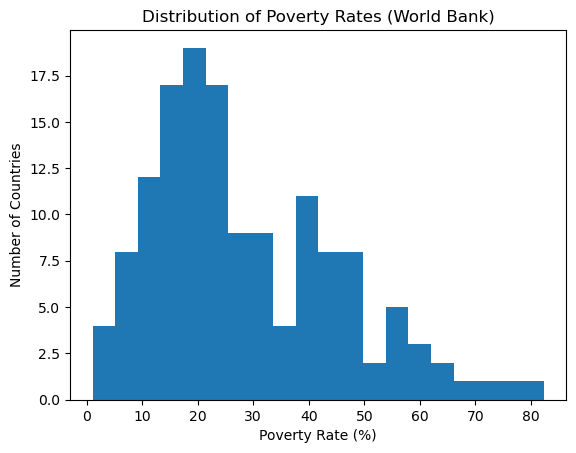

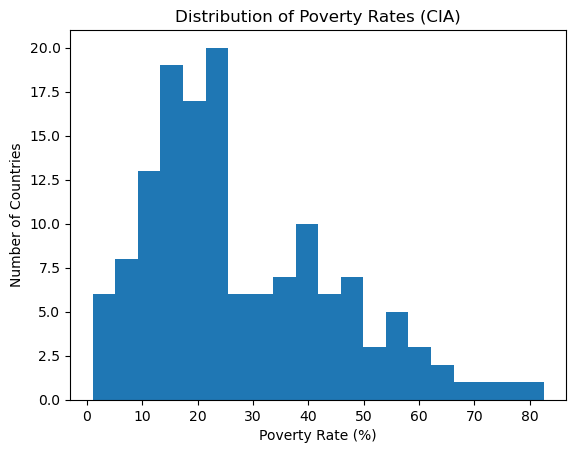

In [16]:
import matplotlib.pyplot as plt


plt.hist(data['Poverty(WorldBank)'], bins=20)
plt.title('Distribution of Poverty Rates (World Bank)')
plt.xlabel('Poverty Rate (%)')
plt.ylabel('Number of Countries')
plt.show()

plt.hist(data['Poverty(CIA)'], bins=20)
plt.title('Distribution of Poverty Rates (CIA)')
plt.xlabel('Poverty Rate (%)')
plt.ylabel('Number of Countries')
plt.show()


show the frequency distribution of poverty rates for each indicator, with the x-axis representing the poverty rate and the y-axis representing the number of countries with that poverty rate, uses 20 bins to create a smooth distribution

another visualization: scatterplot 

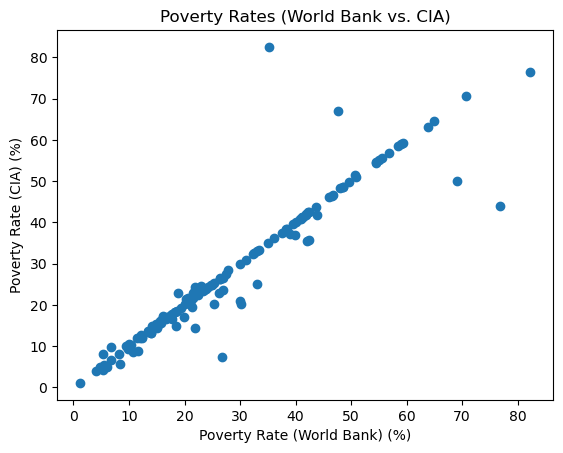

In [17]:

plt.scatter(data['Poverty(WorldBank)'], data['Poverty(CIA)'])
plt.title('Poverty Rates (World Bank vs. CIA)')
plt.xlabel('Poverty Rate (World Bank) (%)')
plt.ylabel('Poverty Rate (CIA) (%)')
plt.show()


This will show each country's poverty rate according to both indicators, with the x-axis representing the poverty rate according to the World Bank and the y-axis representing the poverty rate according to the CIA.